## this notebook is to run an exploration of the impact of the different hyperparameters of the fit


In [129]:
# load the relevant modules for the analysis

import os
from pathlib import Path

from pl_temp_fit import Exp_data_utils, config_utils, fit_pl_utils

os.chdir("/media/mohammed/Work/pl_temp_fit/")

In [130]:
exp_dataset_path = Path(
    "/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv"
)


In [3]:
# Read the experimental data available
csv_files = list(exp_dataset_path.glob("*.csv"))
string_to_find = "ITIC"
for id, csv_file in enumerate(csv_files):
    if string_to_find in str(csv_file):
        print(id, csv_file)

1 /media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500.csv
2 /media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-soln_mod_split0_split500.csv
3 /media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITICDIO-300K-9_G0_650.0nm_1450.0nm_12-07-2024-12h-49m_Exposure_2.0s_mod_split0_split500_mod_split0_split500.csv
12 /media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500_mod_split0_split500.csv
21 /media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITICDIO-300K-9_G0_650.0nm_1450.0nm_12-07-2024-12h-49m_Exposure_2.0s_mod_split0_split500.csv


/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500.csv


'/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500.csv'

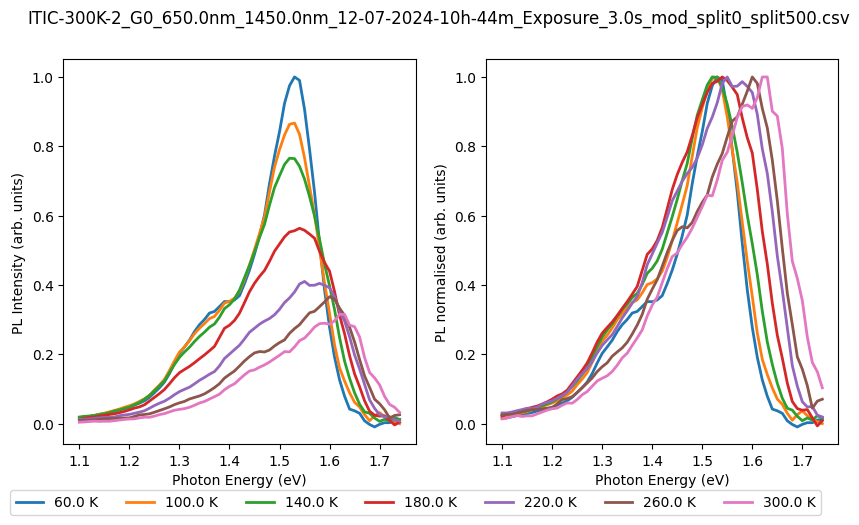

In [4]:
# choose the data to be analysed
# and plot them

csv_name = csv_files[1]
print(csv_name)
Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)
fig, ax = Exp_data_utils.plot_pl_data(
    Exp_data, temperature_list, hws, title=csv_name.name.split("/")[-1]
)
csv_name.absolute().as_posix()

[ 60. 100. 140. 180. 220. 260. 300.]
/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500_mod_split0_split500.csv
/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500_mod_split0_split500.csv


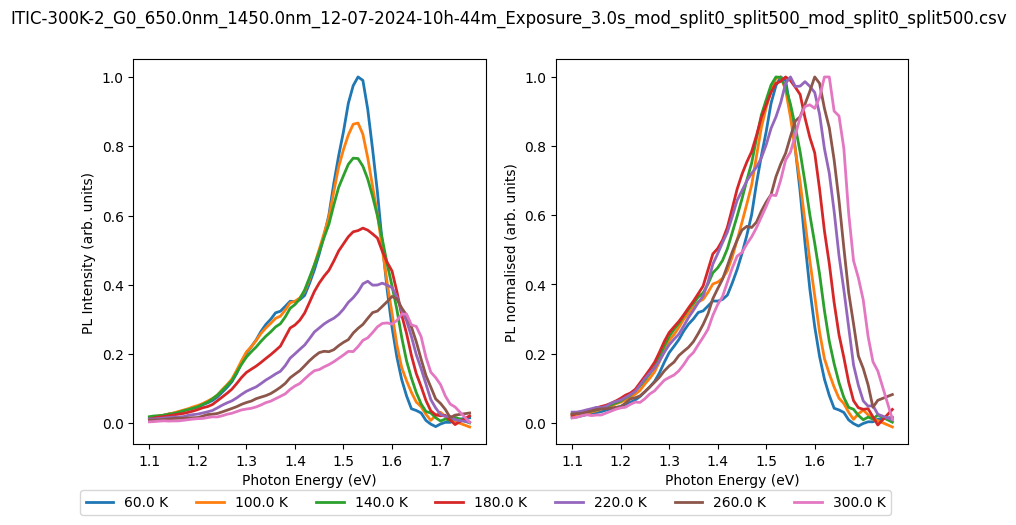

In [5]:
csv_names = Exp_data_utils.change_wavelength_range(
    csv_name,
    hws_limits=[1.1, 1.77],
    step=0.01,
    temperature_split=[],
)
for xsc_name in csv_names:
    Exp_data, temperature_list, hws = Exp_data_utils.read_data(xsc_name)
    fig, ax = Exp_data_utils.plot_pl_data(
        Exp_data, temperature_list, hws, title=xsc_name.name.split("/")[-1]
    )
    print(xsc_name)

In [ ]:
# additional _exp data
max_abs_pos_exp = 1.77

temperature_lifetimes_exp = {
    "300": 3.2e-10,
    "260": 4.1e-10,
    "220": 5.1e-10,
    "180": 7.2e-10,
    "140": 8.9e-10,
    "100": 1.1e-09,
    "60": 1.1e-09,
}

# define the error in the data
(
    number_free_parameters,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_pl,
    noise_sigma,
) = (5, 10, 0.005, 0.05, 0.001)
error_in_max_abs_pos = 0.005
relative_error_lifetime = 0.05

# Define the model parameters

fixed_parameters_dict = {
    "EX": {
        "numbrstates": 20,
        "disorder_ext": 0.1,
    },
    "CT": {"off": 1},
    "D": {},
}
params_to_fit_init = {
    "EX": {"E": 1.7, "sigma": 0.04, "Li": 7.8e-2, "Lo": 0.11, "hO": 0.159},
    "CT": {},
    "D": {},
}
min_bounds = {
    "EX": {"E": 1.5, "sigma": 0.001, "Li": 0.03, "Lo": 0.03, "hO": 0.1},
    "CT": {},
    "D": {},
}
max_bounds = {
    "EX": {"E": 1.9, "sigma": 0.1, "Li": 0.2, "Lo": 0.2, "hO": 0.2},
    "CT": {},
    "D": {},
}
# set the paths for the database and the data
database_folder = "fit_experimental_emcee_pl/fit_data_base/sensitivity/"
data_folder = "fit_experimental_emcee_pl/fit_data/sensitivity/"
path_database = Path(database_folder)
# set fitting parameters
num_iteration_max_likelihood = 5
coeff_spread = 1.0
nsteps = 10000
num_coords = 32

# save the model config
for _csv_name in csv_names:
    model_config, test_id = config_utils.save_model_config(
        csv_name_pl=_csv_name,
        Temp_std_err=Temp_std_err,
        hws_std_err=hws_std_err,
        relative_intensity_std_error_pl=relative_intensity_std_error_pl,
        temperature_list_pl=temperature_list,
        hws_pl=hws,
        noise_sigma=noise_sigma,
        fixed_parameters_dict=fixed_parameters_dict,
        params_to_fit_init=params_to_fit_init,
        min_bounds=min_bounds,
        max_bounds=max_bounds,
        num_iteration_max_likelihood=num_iteration_max_likelihood,
        coeff_spread=coeff_spread,
        nsteps=nsteps,
        num_coords=num_coords,
        database_folder=database_folder,
        data_folder=data_folder,
        temperature_lifetimes_exp=temperature_lifetimes_exp,
        max_abs_pos_exp=max_abs_pos_exp,
        error_in_max_abs_pos=error_in_max_abs_pos,
        relative_error_lifetime=relative_error_lifetime,
    )

size of hw is (67,)
size of temperature_list is (7,)


shape of mean value plot is (67, 7)


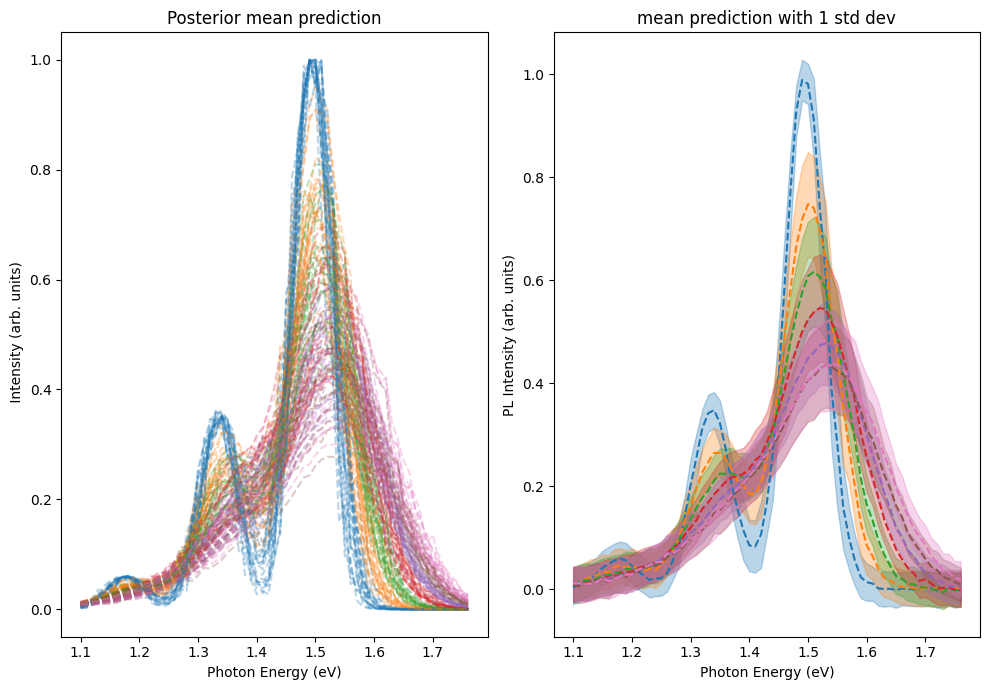

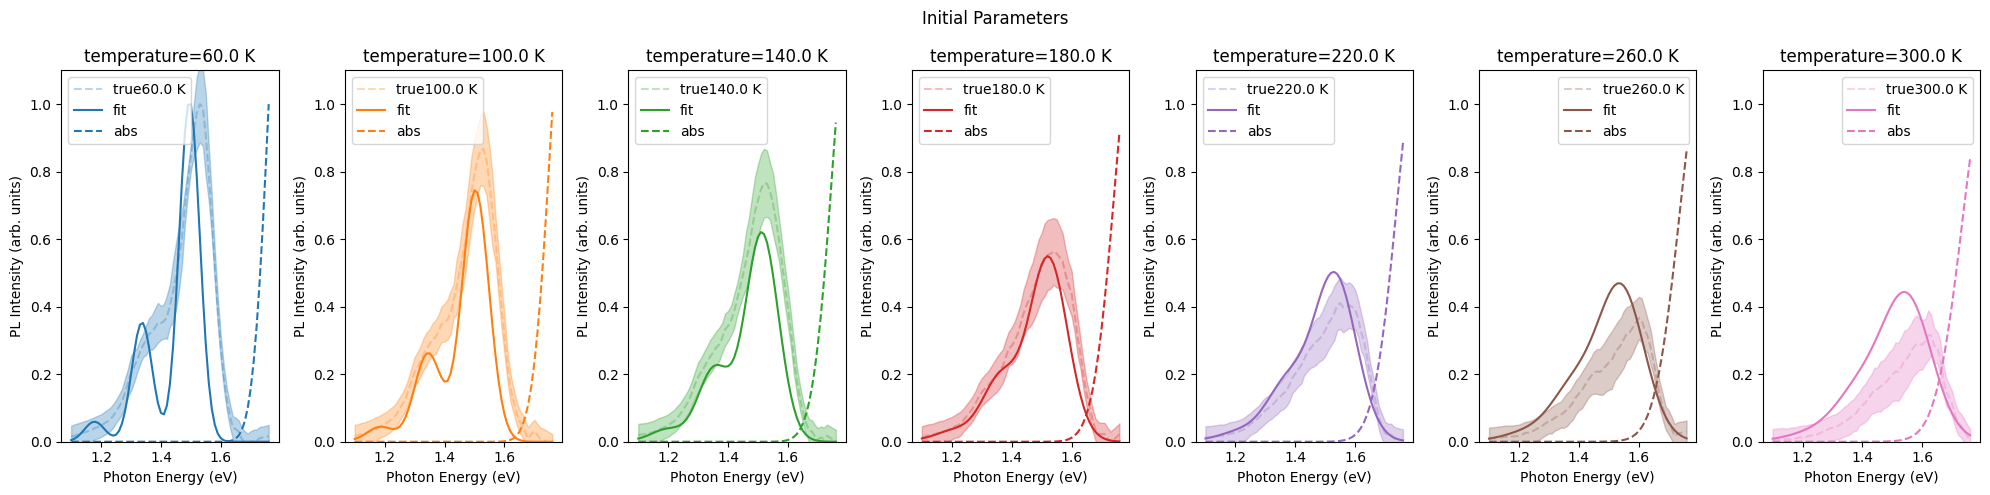

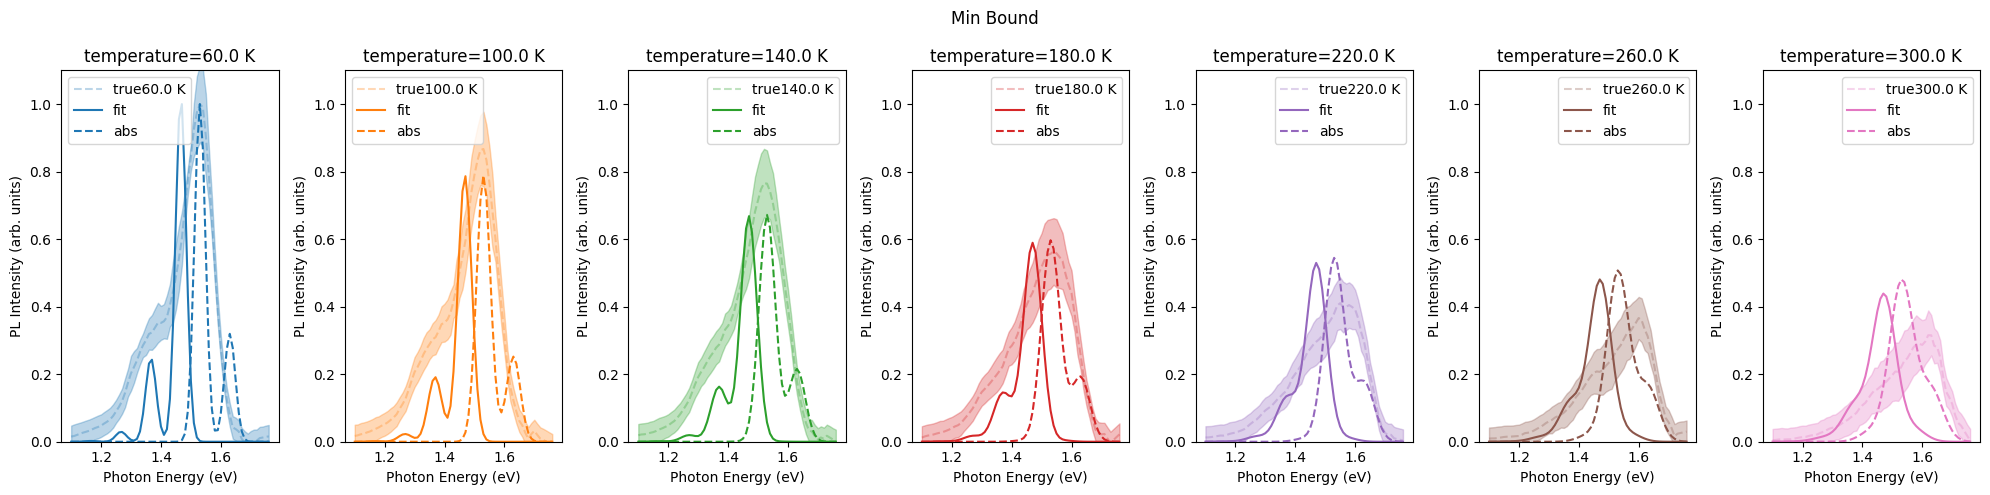

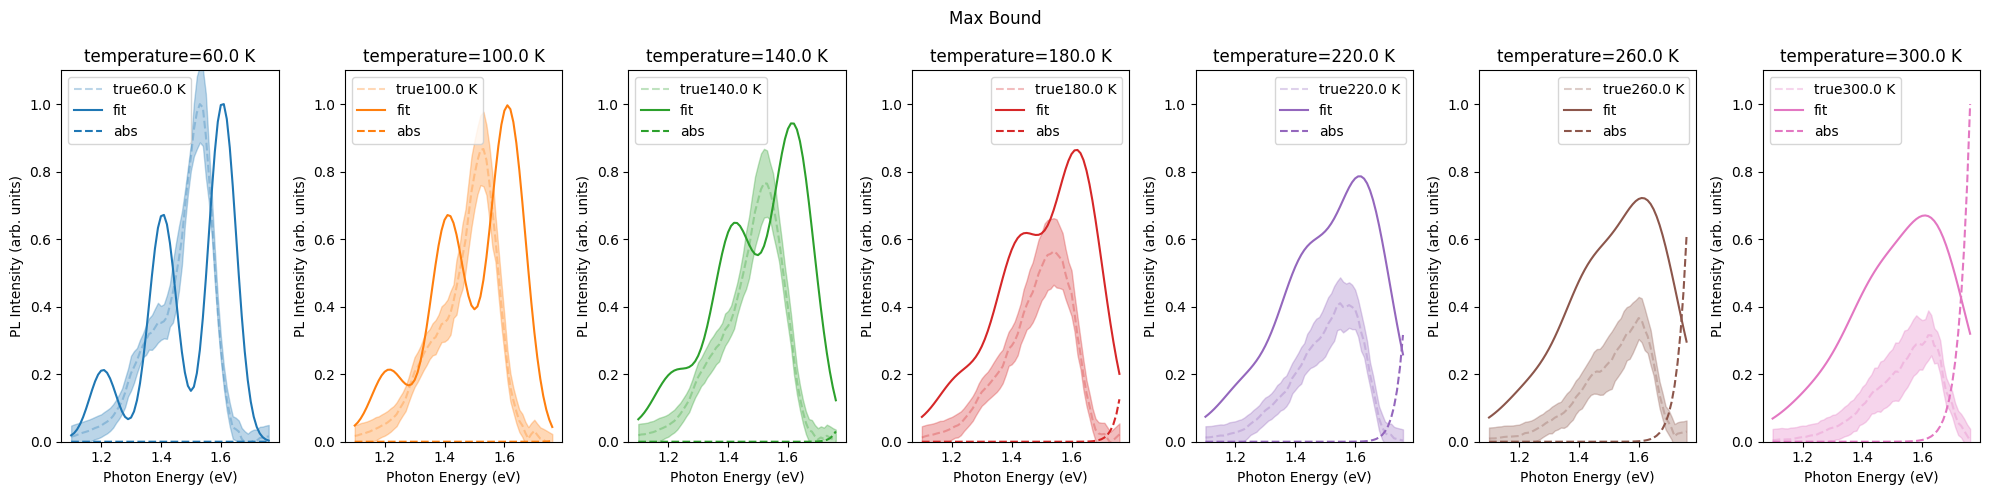

In [211]:
model_config, model_config_save = config_utils.load_model_config(
    test_id, database_folder=path_database
)
fit_pl_utils.plot_fit_limits(model_config, model_config_save)


In [213]:
print(
    f"python src/pl_temp_fit/scripts/new_pl_sampling_alllifetimes_abs.py --model_config_id sensitivity/{test_id} "
)

python src/pl_temp_fit/scripts/new_pl_sampling_alllifetimes_abs.py --model_config_id sensitivity/c9317e59-0f30-4dd5-ab05-18b0611df334 


In [216]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fit_statistics(
    reader,
    range_chi_square=(0, 3),
    range_log_prior=(-1000, 0),
    discard=5,
    filter_log_likelihood="",
):
    """Plot the fit statistics from the sampling output.

    reader: the reader object from the emcee sampler
    range_chi_square: the range for the chi square plot
    range_log_prior: the range for the log prior plot
    discard: the number of samples to discard
    filter_log_likelihood: whether to filter the log likelihood
    """
    print("number of iterations", reader.iteration)
    blobs = reader.get_blobs(flat=True, discard=discard)
    distribution = reader.get_chain(discard=discard, flat=True)
    log_likelihood = reader.get_log_prob(discard=discard, flat=True)
    distribution = eval(f" distribution[{filter_log_likelihood}]")
    log_likelihood = eval(f" log_likelihood[{filter_log_likelihood}]")
    print("shape of likelihood", log_likelihood.shape)  

    fig, ax = plt.subplots(2, 3, figsize=(10, 7))
    ax = ax.flatten()
    ax[0].scatter(
        np.arange(len(log_likelihood[0])),
        log_likelihood[0],
        color="C" + str(0),
        linewidth=2,
        s=1
    )
    ax[0].set_ylim(range_log_prior)
    ax[0].set_xlabel("log likelihood")
    ax[0].set_ylabel("Number of samples")
    ax[0].set_title("log likelihood distribution")
    for i,blob in enumerate(blobs.dtype.names):
        if i>4: 
            break
        ax[i+1].scatter(
            np.arange(len(blobs[blob])),
            blobs[blob],
            color="C" + str(i+1),
            s=1,
            #range=range_chi_square,
        )
        ax[i+1].set_xlabel(blob)
        ax[i+1].set_ylabel("Number of samples")
        ax[i+1].set_title(f"{blob}")
        

    fig.tight_layout()
    for axi in ax:
        axi.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    fig.tight_layout()
    plt.show()

number of iterations 271
shape of likelihood (1, 8672)


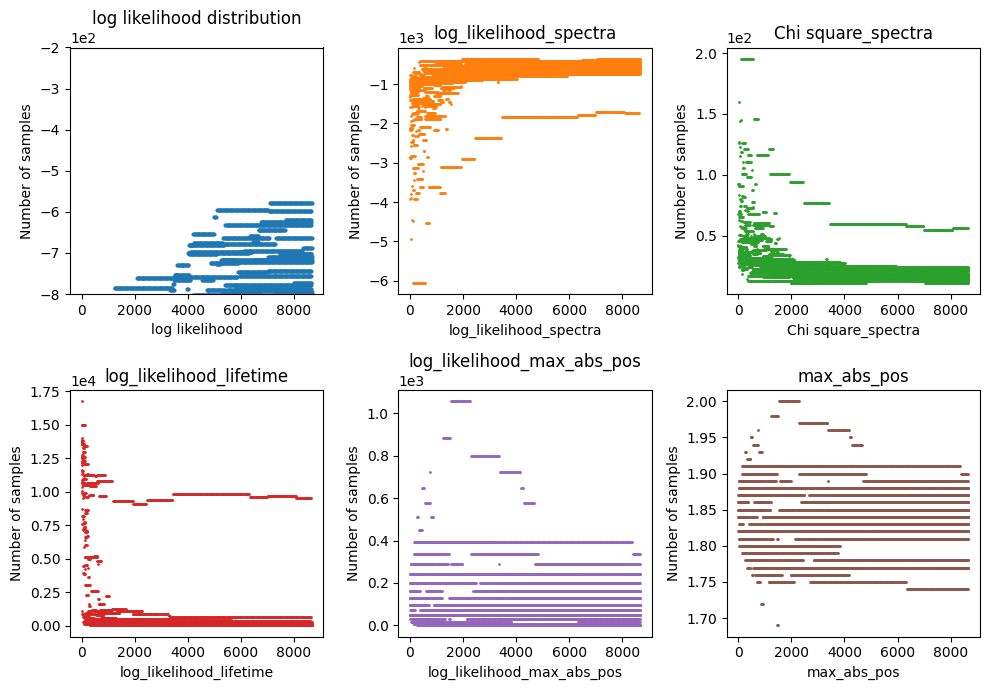

In [242]:
# analyse the data
import emcee

model_config, model_config_save = config_utils.load_model_config(
    test_id, database_folder=path_database
)

filename = model_config_save["save_folder"] + "/sampler.h5"
reader = emcee.backends.HDFBackend(filename, name="multi_core")
distribution = reader.get_chain(discard=0, flat=True)
import importlib

from pl_temp_fit import plot_utils

importlib.reload(plot_utils)
plot_fit_statistics(
    reader,
    range_log_prior=(-800, -200),
    discard=0,
    range_chi_square=(0, 10),
    filter_log_likelihood=True,
)

(<Figure size 1000x750 with 5 Axes>,
 array([<Axes: ylabel='EX_E'>, <Axes: ylabel='EX_sigma'>,
        <Axes: ylabel='EX_Li'>, <Axes: ylabel='EX_Lo'>,
        <Axes: xlabel='step number', ylabel='EX_hO'>], dtype=object))

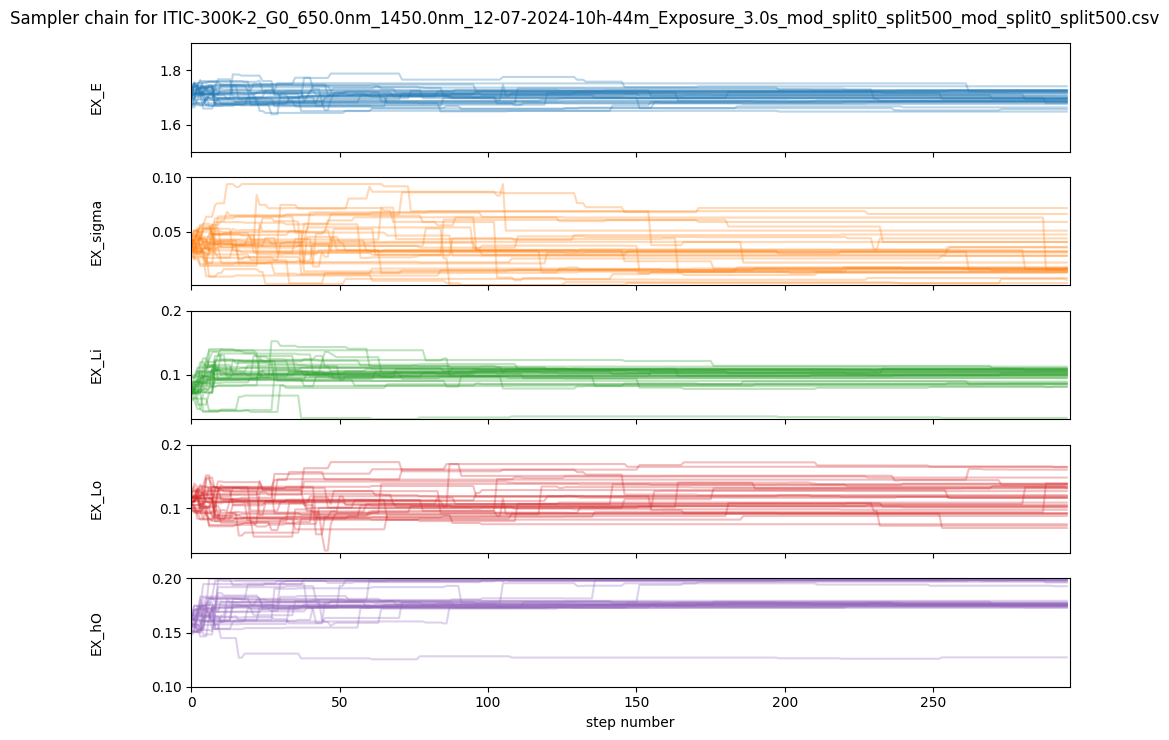

In [244]:
plot_utils.plot_chains(reader, model_config_save, discard=0)

shape of mean value plot is (67, 7)


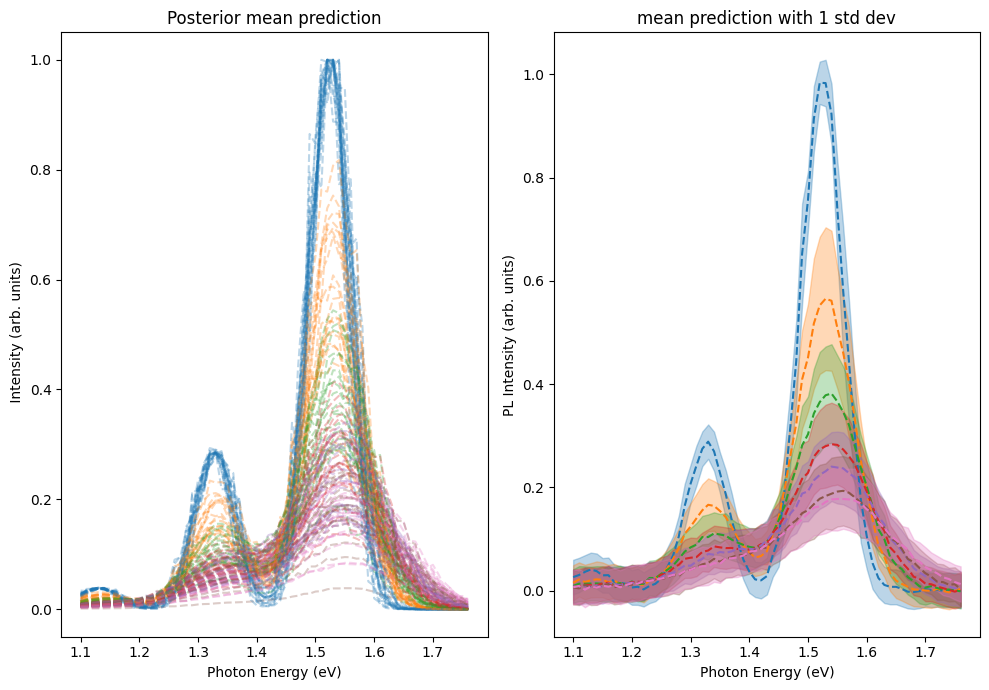

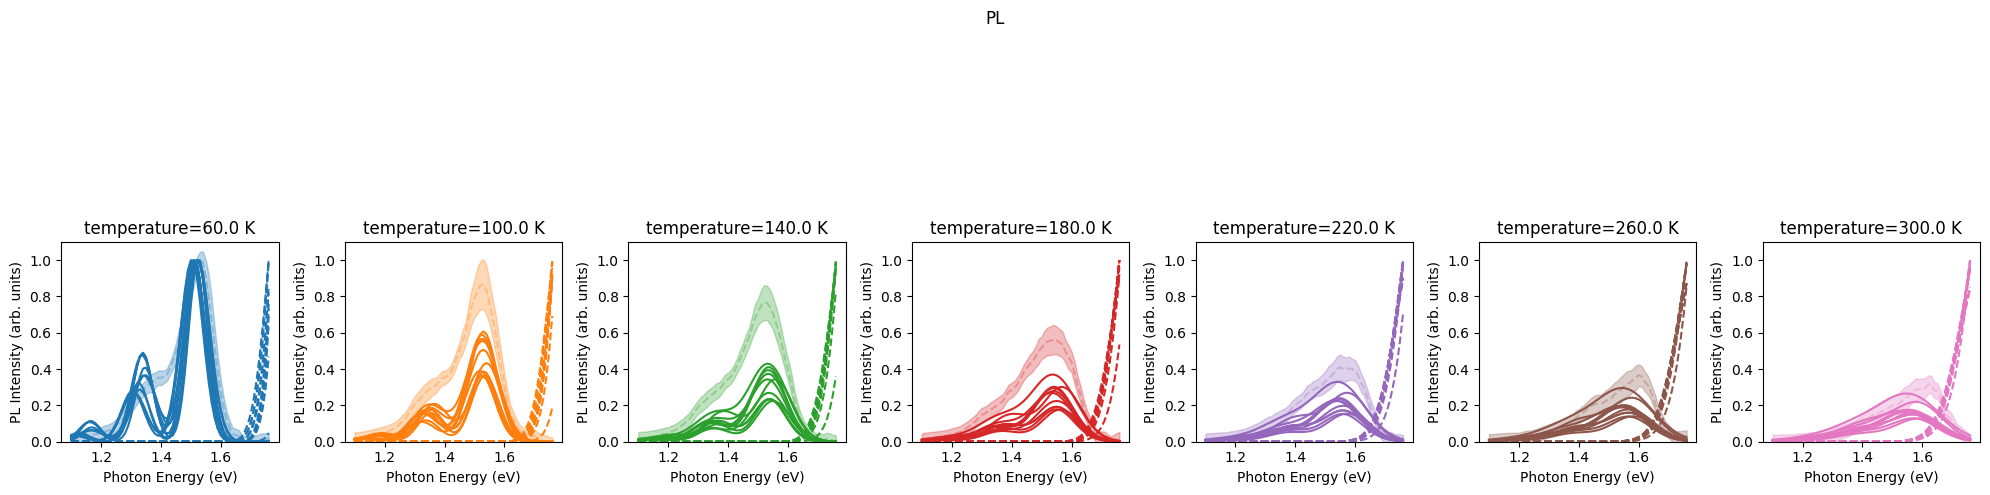

In [236]:
filter_log_likelihood = (
    "blobs['log_likelihood_spectra'] > max(blobs['log_likelihood_spectra']) * 2"
)
plot_utils.plot_fit_to_experimental_data(
    model_config_save,
    model_config,
    reader,
    discard=0,
    filter_log_likelihood=filter_log_likelihood,
)

(<Figure size 2250x2250 with 54 Axes>,
 array([[<Axes: ylabel='EX_E'>, None, None, None, None, None, None, None,
         None],
        [<Axes: xlabel='EX_E', ylabel='EX_sigma'>, <Axes: >, None, None,
         None, None, None, None, None],
        [<Axes: xlabel='EX_E', ylabel='EX_Li'>,
         <Axes: xlabel='EX_sigma', ylabel='EX_Li'>, <Axes: >, None, None,
         None, None, None, None],
        [<Axes: xlabel='EX_E', ylabel='EX_Lo'>,
         <Axes: xlabel='EX_sigma', ylabel='EX_Lo'>,
         <Axes: xlabel='EX_Li', ylabel='EX_Lo'>, <Axes: >, None, None,
         None, None, None],
        [<Axes: xlabel='EX_E', ylabel='EX_hO'>,
         <Axes: xlabel='EX_sigma', ylabel='EX_hO'>,
         <Axes: xlabel='EX_Li', ylabel='EX_hO'>,
         <Axes: xlabel='EX_Lo', ylabel='EX_hO'>, <Axes: >, None, None,
         None, None],
        [<Axes: xlabel='EX_E', ylabel='log_likelihood_spectra'>,
         <Axes: xlabel='EX_sigma', ylabel='log_likelihood_spectra'>,
         <Axes: xlabel='EX_

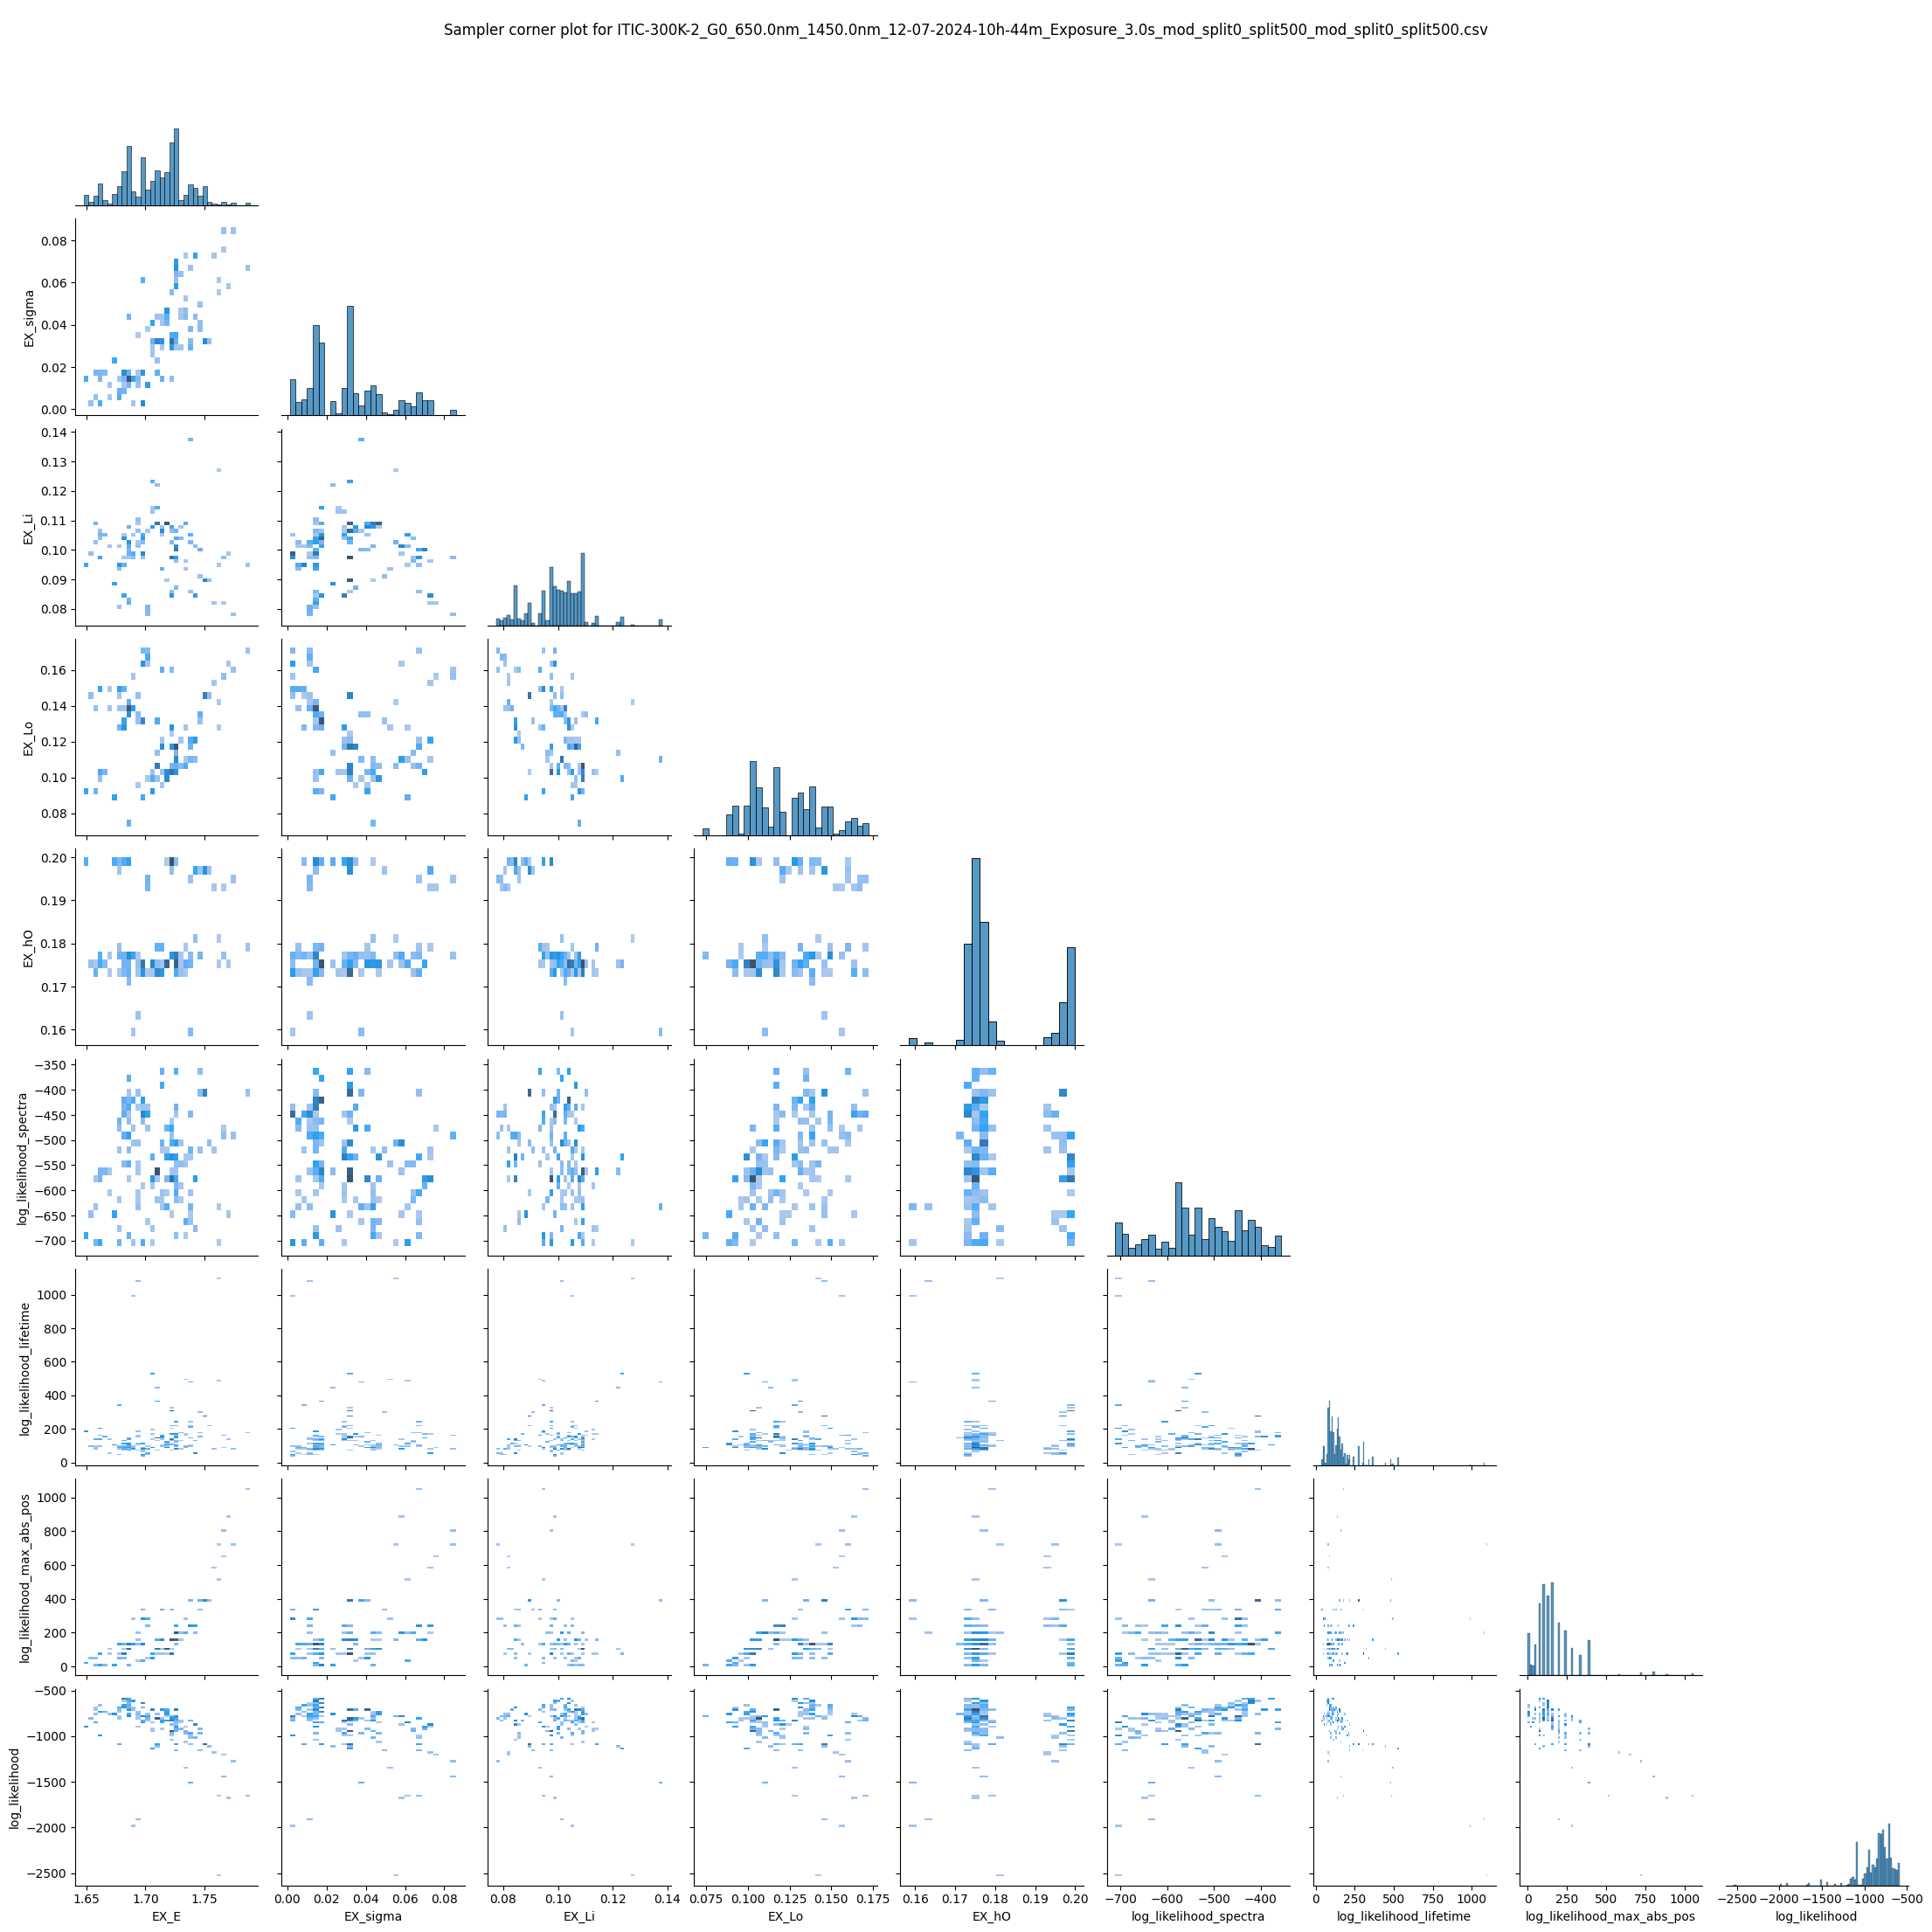

In [245]:
import pandas as pd 
import seaborn as sns


def plot_corner(reader, model_config_save, discard=10,
                filter_log_likelihood=False):
    """plot the corner plot from the sampling output
    reader: the reader object from the emcee sampler
    model_config_save: the model config save dictionary
    discard: the number of samples to discard
    """
    csv_name = model_config_save["csv_name_pl"]
    label_list = []

    for key in model_config_save["params_to_fit_init"].keys():
        label_list.extend(
            [
                key + "_" + x
                for x in model_config_save["params_to_fit_init"][key].keys()
            ]
        )
    labels = label_list
    samples = reader.get_chain(discard=discard, flat=True)
    blobs = reader.get_blobs(flat=True, discard=discard)
    log_likelihood = reader.get_log_prob(discard=discard, flat=True)
    samples = eval(f" samples[{filter_log_likelihood}]")
    log_likelihood = eval(f" log_likelihood[{filter_log_likelihood}]")
    blobs = eval(f" blobs[{filter_log_likelihood}]")

    samples = samples.reshape(-1, len(labels))
    df_samples = pd.DataFrame(samples, columns=labels)
    df_samples["log_likelihood_spectra"] = blobs["log_likelihood_spectra"]
    df_samples["log_likelihood_lifetime"] = blobs["log_likelihood_lifetime"]
    df_samples["log_likelihood_max_abs_pos"] = blobs["log_likelihood_max_abs_pos"]
    df_samples["log_likelihood"] = log_likelihood
    g = sns.pairplot(df_samples, kind="hist", corner=True)
    g.fig.suptitle(f"Sampler corner plot for {csv_name.split('/')[-1]}")
    return g.fig, g.axes

plot_corner(
    reader,
    model_config_save,
    discard=20,
    filter_log_likelihood=filter_log_likelihood,
)

(<Figure size 1250x1250 with 20 Axes>,
 array([[<Axes: ylabel='EX_E'>, None, None, None, None],
        [<Axes: xlabel='EX_E', ylabel='EX_sigma'>, <Axes: >, None, None,
         None],
        [<Axes: xlabel='EX_E', ylabel='EX_Li'>,
         <Axes: xlabel='EX_sigma', ylabel='EX_Li'>, <Axes: >, None, None],
        [<Axes: xlabel='EX_E', ylabel='EX_Lo'>,
         <Axes: xlabel='EX_sigma', ylabel='EX_Lo'>,
         <Axes: xlabel='EX_Li', ylabel='EX_Lo'>, <Axes: >, None],
        [<Axes: xlabel='EX_E', ylabel='EX_hO'>,
         <Axes: xlabel='EX_sigma', ylabel='EX_hO'>,
         <Axes: xlabel='EX_Li', ylabel='EX_hO'>,
         <Axes: xlabel='EX_Lo', ylabel='EX_hO'>, <Axes: xlabel='EX_hO'>]],
       dtype=object))

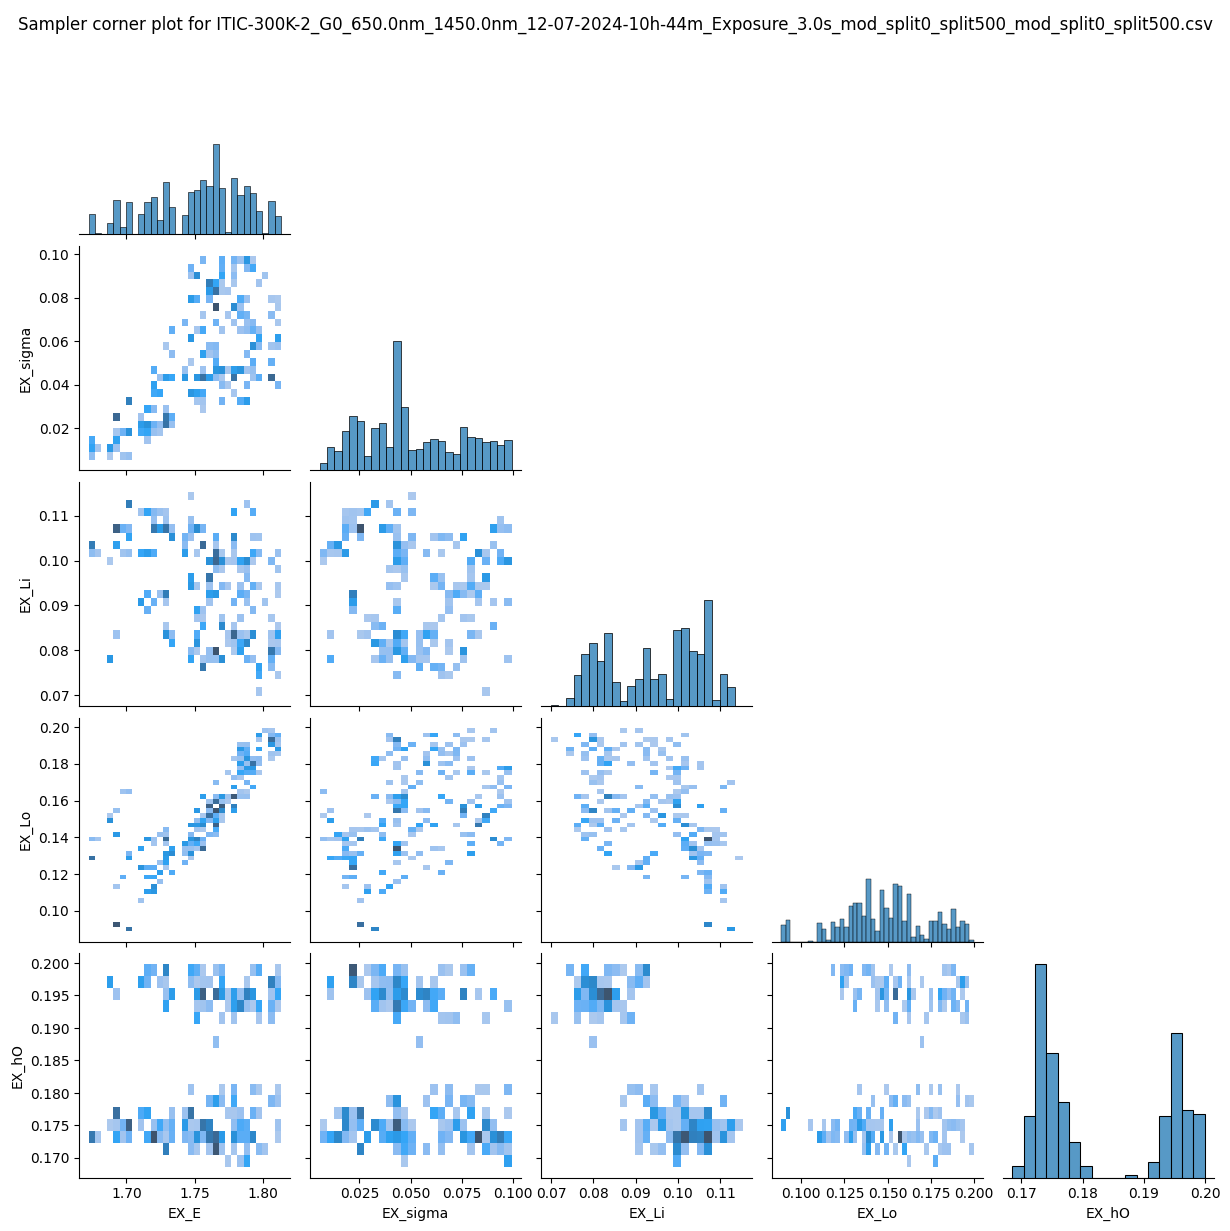

In [202]:
plot_utils.plot_corner(
    reader,
    model_config_save,
    discard=0,
    filter_log_likelihood=filter_log_likelihood,
)

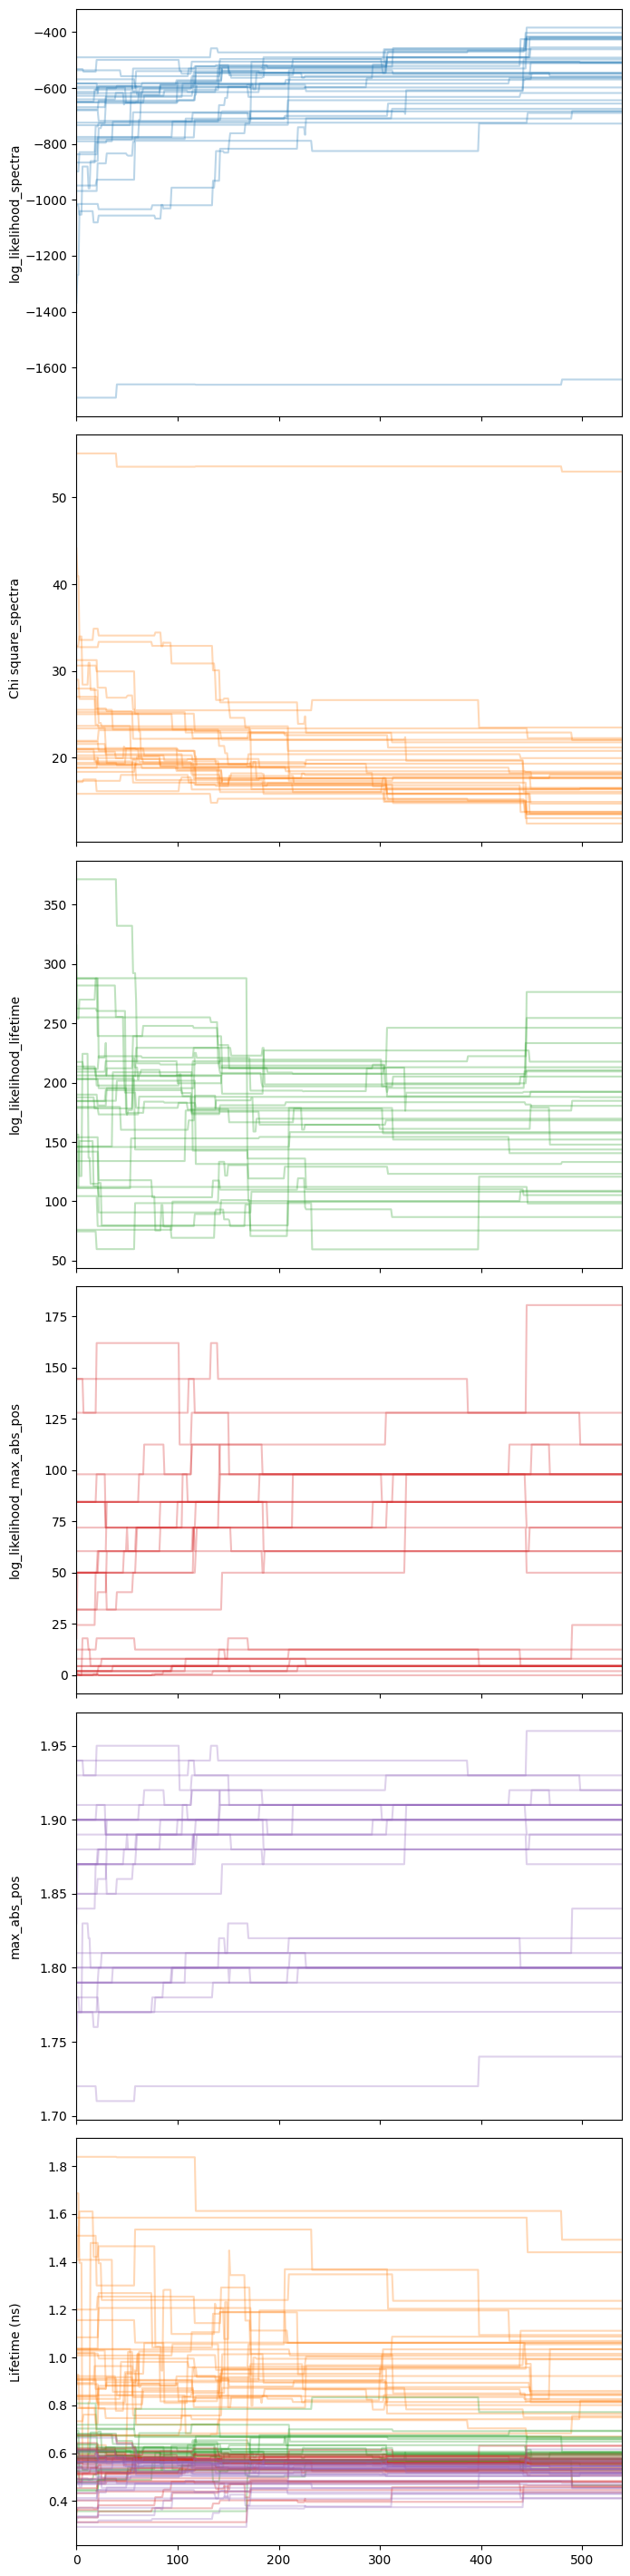

In [98]:
def plot_blobs_chain(
    reader, model_config_save, discard=0, filter_log_likelihood=None,
    temp_lifetime=[60,140,220,300]
):
    blobs = reader.get_blobs(discard=discard)
    num_blobs = len(blobs.dtype.names)
    fig, axes = plt.subplots(
        5 + 1, figsize=(7, 1.5 * num_blobs), sharex=True
    )
    for i in range(num_blobs):
        
        ax = axes[i]
        ax.plot(blobs[blobs.dtype.names[i]], alpha=0.3, color="C" + str(i))
        ax.set_xlim(0, len(blobs))
        ax.set_ylabel(blobs.dtype.names[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)
        if i > 3:
            break
    lifetime_dict = {}
    for temp in temp_lifetime:
        lifetime_dict[temp] = 1/ (blobs[f"Ex_kr_{temp:.1f}K"] + blobs[f"Ex_knr_{temp:.1f}K"]) * 1e9

    ax = axes[i + 1]
    for i, (temp, lifetime) in enumerate(lifetime_dict.items()):
        ax.plot(lifetime, alpha=0.3, color="C" + str(i + 1))
    ax.set_xlim(0, len(blobs))
    ax.set_ylabel("Lifetime (ns)")
    ax.yaxis.set_label_coords(-0.1, 0.5)
    #ax.set_ylim(0, 2)
    fig.tight_layout()


plot_blobs_chain(reader, model_config_save, discard=100)